In [1]:
#theta = (X' w X)inv X' w y

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
dfx = pd.read_csv("weightedX.csv")
dfy = pd.read_csv("weightedY.csv")

In [83]:
X = dfx.values
Y = dfy.values
print(X.shape)

(99, 1)


In [84]:
X = (X - X.mean()) / X.std()

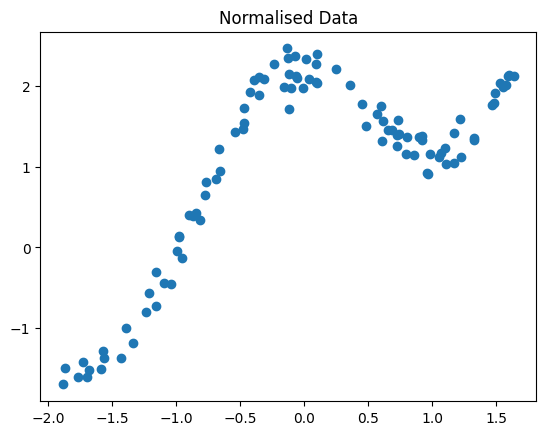

In [85]:
plt.title("Normalised Data")
plt.scatter(X, Y)
plt.show()

In [86]:
#Calculate weighted matrix, tau must be samall otherwsie w will become identity matrix

In [145]:
def getW(x, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
#     print(W)
    for i in range(M):
        xi = X[i]
        ans = np.exp(-np.dot((xi - x), (xi - x).T) / (2 * tau * tau))
        W[i,i] = ans
    return W


In [146]:
X = np.mat(X)
Y = np.mat(Y)

getW(5, X, 100)
#Make predictions

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\595482437.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i,i] = ans


matrix([[0.99856613, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.99830911, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.99856749, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.99875667, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.99903466,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.99928605]])

In [152]:
def predict(X, Y, query_x, tau):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((X, ones))
    
    qx = np.mat([query_x, 1])
    
    W = getW(qx, X_, tau)
#     print(X_.shape)
    theta = np.linalg.pinv(X_.T * (W*X_)) * (X_.T * (W * Y))
    pred = np.dot(qx, theta)
    return theta

In [153]:
theta, pred = predict(X, Y, 1.0, 1.0)

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\595482437.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i,i] = ans


In [154]:
#Visualisation

In [166]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta, pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    
    XO = np.array(X)    
    YO = np.array(Y)
    
    plt.style.use('seaborn')
    plt.title("Tau/Bandwith Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test, color = 'red')
    plt.show()

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\595482437.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i,i] = ans
C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\1658869378.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


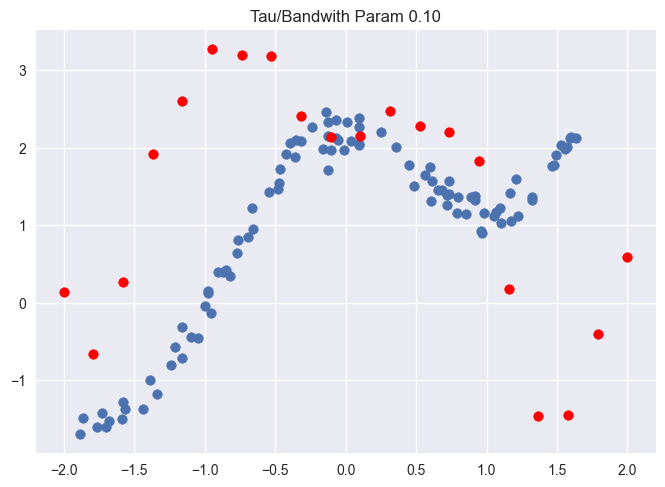

In [167]:
plotPrediction(0.1)

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\595482437.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i,i] = ans
C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\1658869378.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


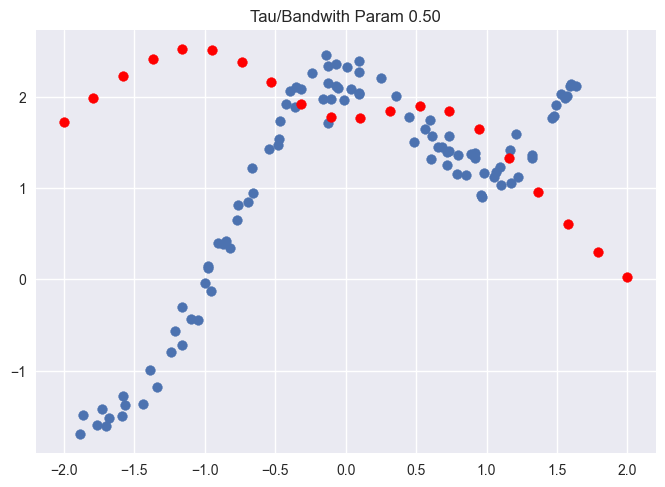

In [168]:
plotPrediction(0.5)

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\595482437.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i,i] = ans
C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\1658869378.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


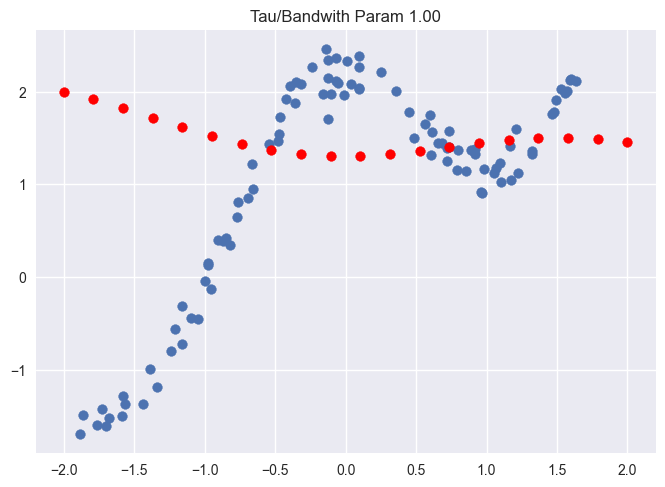

In [169]:
plotPrediction(1.0)

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\595482437.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i,i] = ans
C:\Users\Lakshay\AppData\Local\Temp\ipykernel_30724\1658869378.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


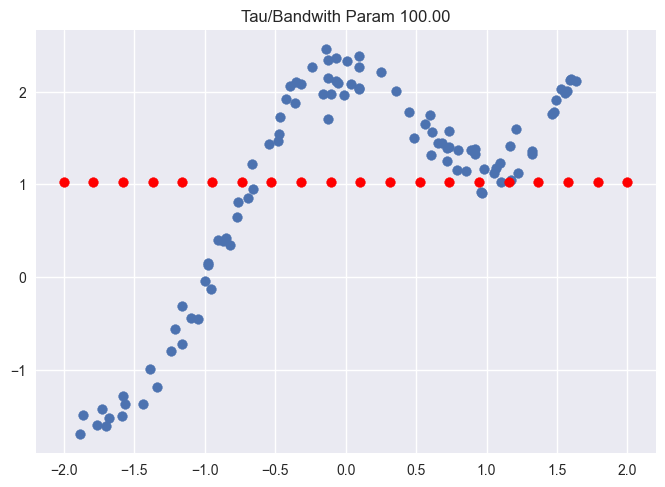

In [170]:
plotPrediction(100)